<a href="https://colab.research.google.com/github/Guldanika/machine-learning-zoomcamp-2025/blob/main/Homework_10_Kubernetes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this homework, we'll deploy the lead scoring model from the homework 5.

We already have a docker image for this model - we'll use it for deploying the model to Kubernetes.

#Building the image
Clone the course repo if you haven't:



In [1]:
!git clone https://github.com/DataTalksClub/machine-learning-zoomcamp.git


Cloning into 'machine-learning-zoomcamp'...
remote: Enumerating objects: 6655, done.
remote: Counting objects: 100% (2915/2915), done.
remote: Compressing objects: 100% (581/581), done.
remote: Total 6655 (delta 2427), reused 2334 (delta 2334), pack-reused 3740 (from 2)
Receiving objects: 100% (6655/6655), 13.75 MiB | 10.06 MiB/s, done.
Resolving deltas: 100% (4227/4227), done.


Go to the course-zoomcamp/cohorts/2025/05-deployment/homework folder and execute the following:

```
docker build -f Dockerfile_full -t zoomcamp-model:3.13.10-hw10 .
```



#Question 1

Run it to test that it's working locally:

```
docker run -it --rm -p 9696:9696 zoomcamp-model:3.13.10-hw10
And in another terminal, execute q6_test.py file:
```

python q6_test.py

You should see this:
```
{'conversion_probability': <value>, 'conversion': False}
```

Here <value> is the probability of getting a subscription. You need to choose the right one.

- 0.29
- 0.49
- 0.69
- 0.89

Now you can stop the container running in Docker.

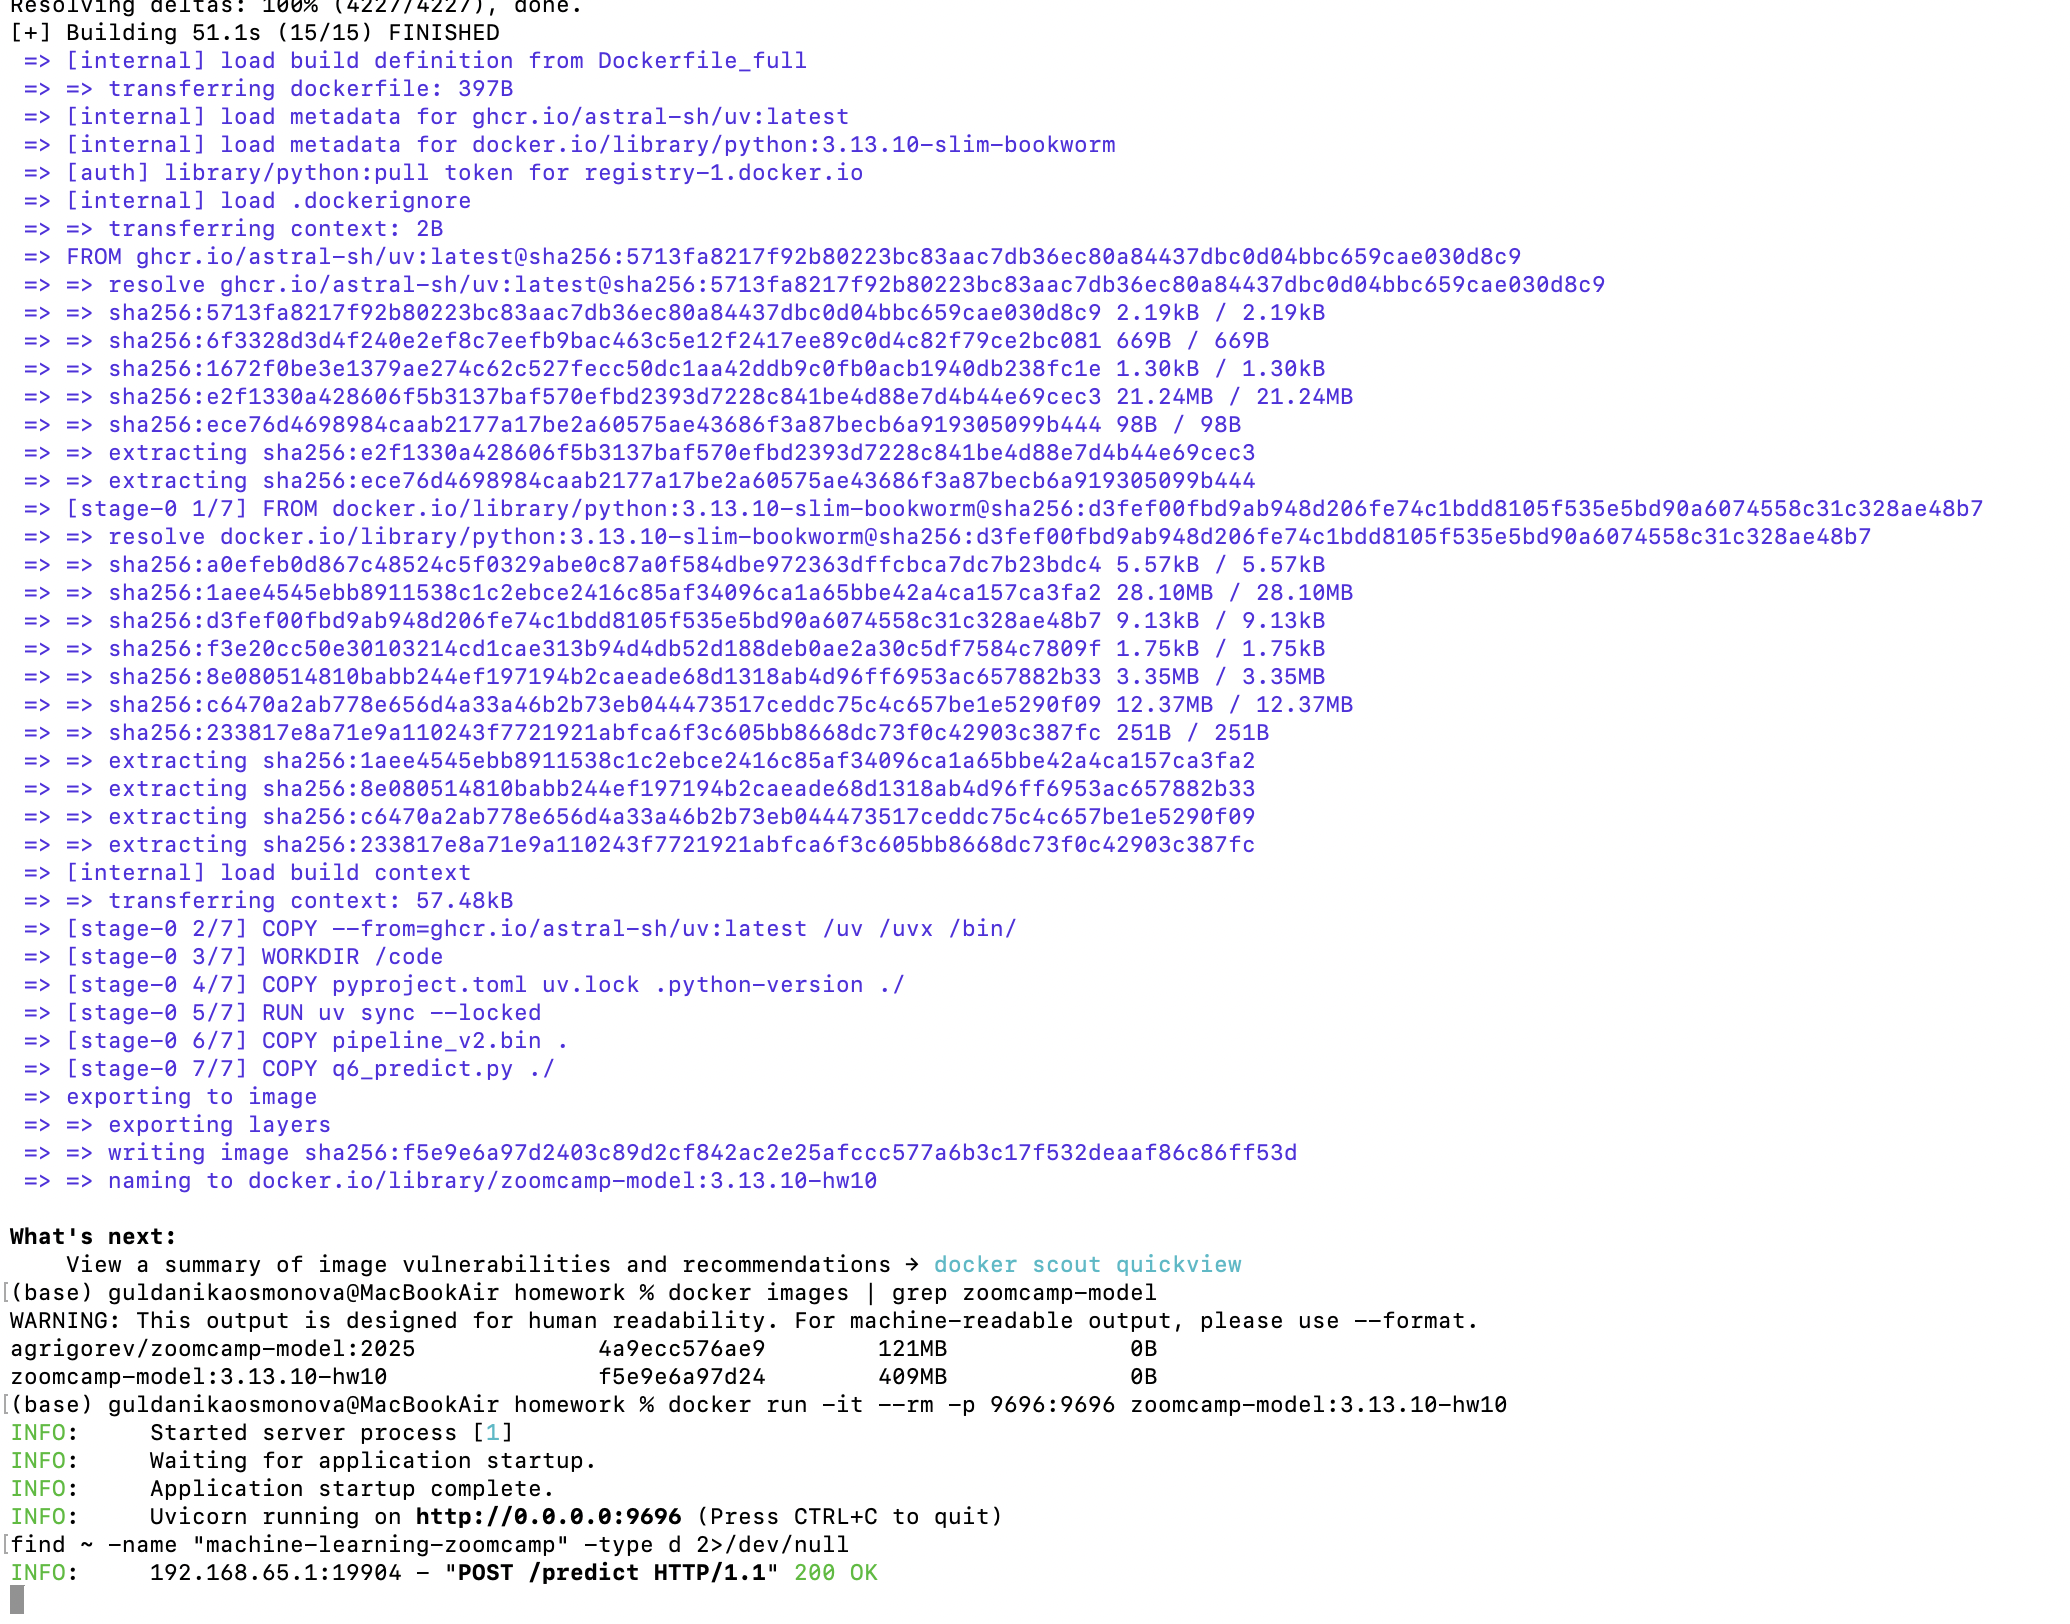

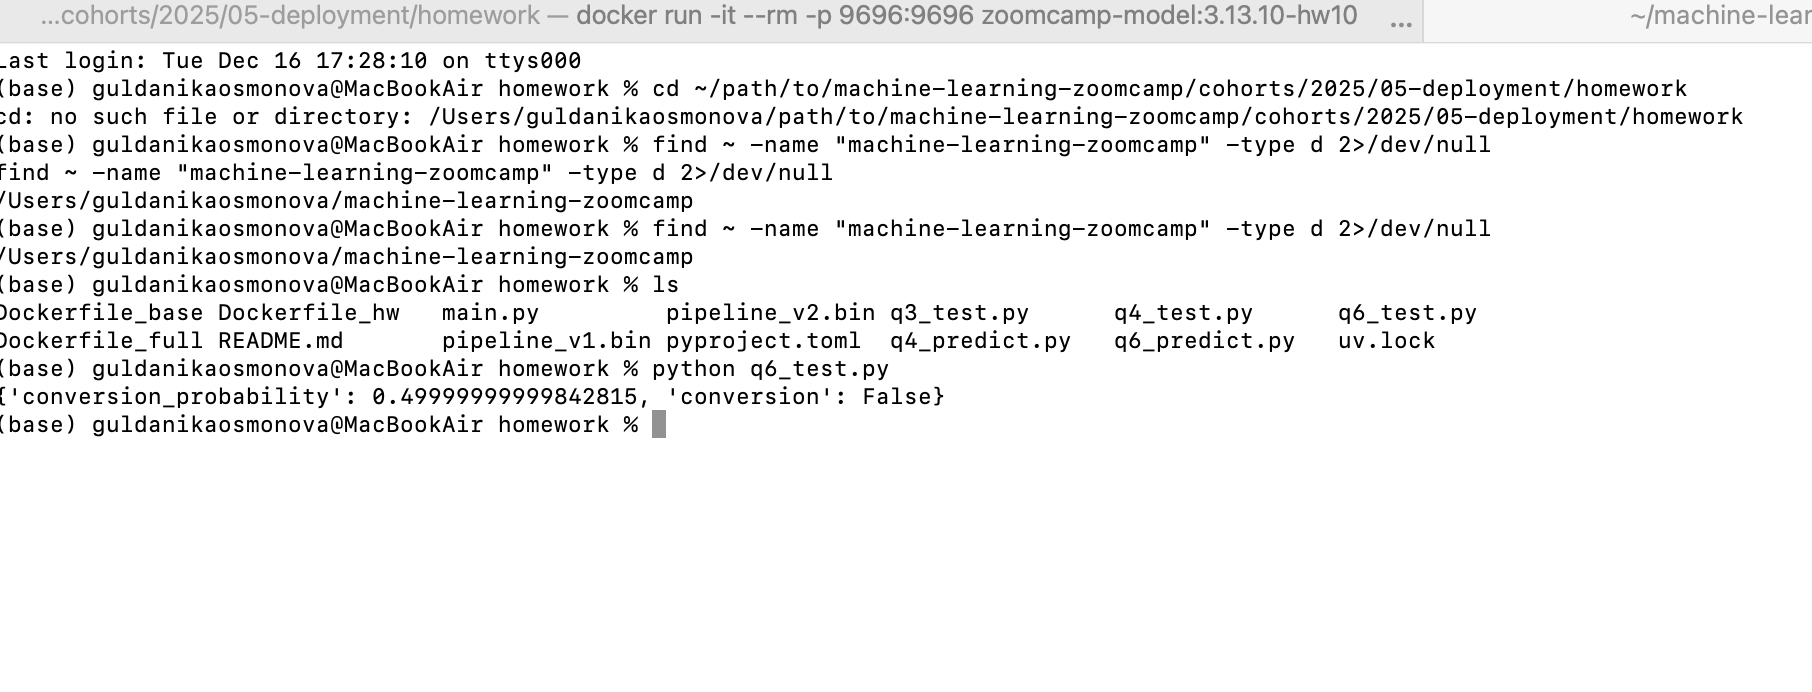

THE ANSWER:

#{'conversion_probability': 0.49999999999842815, 'conversion': False}

#Installing kubectl and kind

You need to install:

kubectl - https://kubernetes.io/docs/tasks/tools/ (you might already have it - check before installing)
kind - https://kind.sigs.k8s.io/docs/user/quick-start/
Question 2
What's the version of kind that you have?

Use kind --version to find out.

Creating a cluster
Now let's create a cluster with kind:

kind create cluster
And check with kubectl that it was successfully created:

kubectl cluster-info

# Question 2
What's the version of kind that you have?

Use kind --version to find out.

Creating a cluster
Now let's create a cluster with kind:

```
kind create cluster
```
And check with kubectl that it was successfully created:

```
kubectl cluster-info
```

#kind version 0.30.0

# Question 3

What's the smallest deployable computing unit that we can create and manage in Kubernetes (kind in our case)?

- Node

**- Pod**
- Deployment
- Service

#Question 4

Now let's test if everything works. Use kubectl to get the list of running services.

**What's the Type of the service that is already running there?**

- NodePort
#- ClusterIP
- ExternalName
- LoadBalancer


#Question 5

To be able to use the docker image we previously created (zoomcamp-model:3.13.10-hw10), we need to register it with kind.

**What's the command we need to run for that?**

- kind create cluster
- kind build node-image
#- kind load docker-image
- kubectl apply


#Question 6

Now let's create a deployment config (e.g. deployment.yaml):


```

apiVersion: apps/v1
kind: Deployment
metadata:
  name: subscription
spec:
  selector:
    matchLabels:
      app: subscription
  replicas: 1
  template:
    metadata:
      labels:
        app: subscription
    spec:
      containers:
      - name: subscription
        image: <Image>
        resources:
          requests:
            memory: "64Mi"
            cpu: "100m"            
          limits:
            memory: <Memory>
            cpu: <CPU>
        ports:
        - containerPort: <Port>
Replace <Image>, <Memory>, <CPU>, <Port> with the correct values.

```

#What is the value for <Port>?

Apply this deployment using the appropriate command and get a list of running Pods. You can see one running Pod.



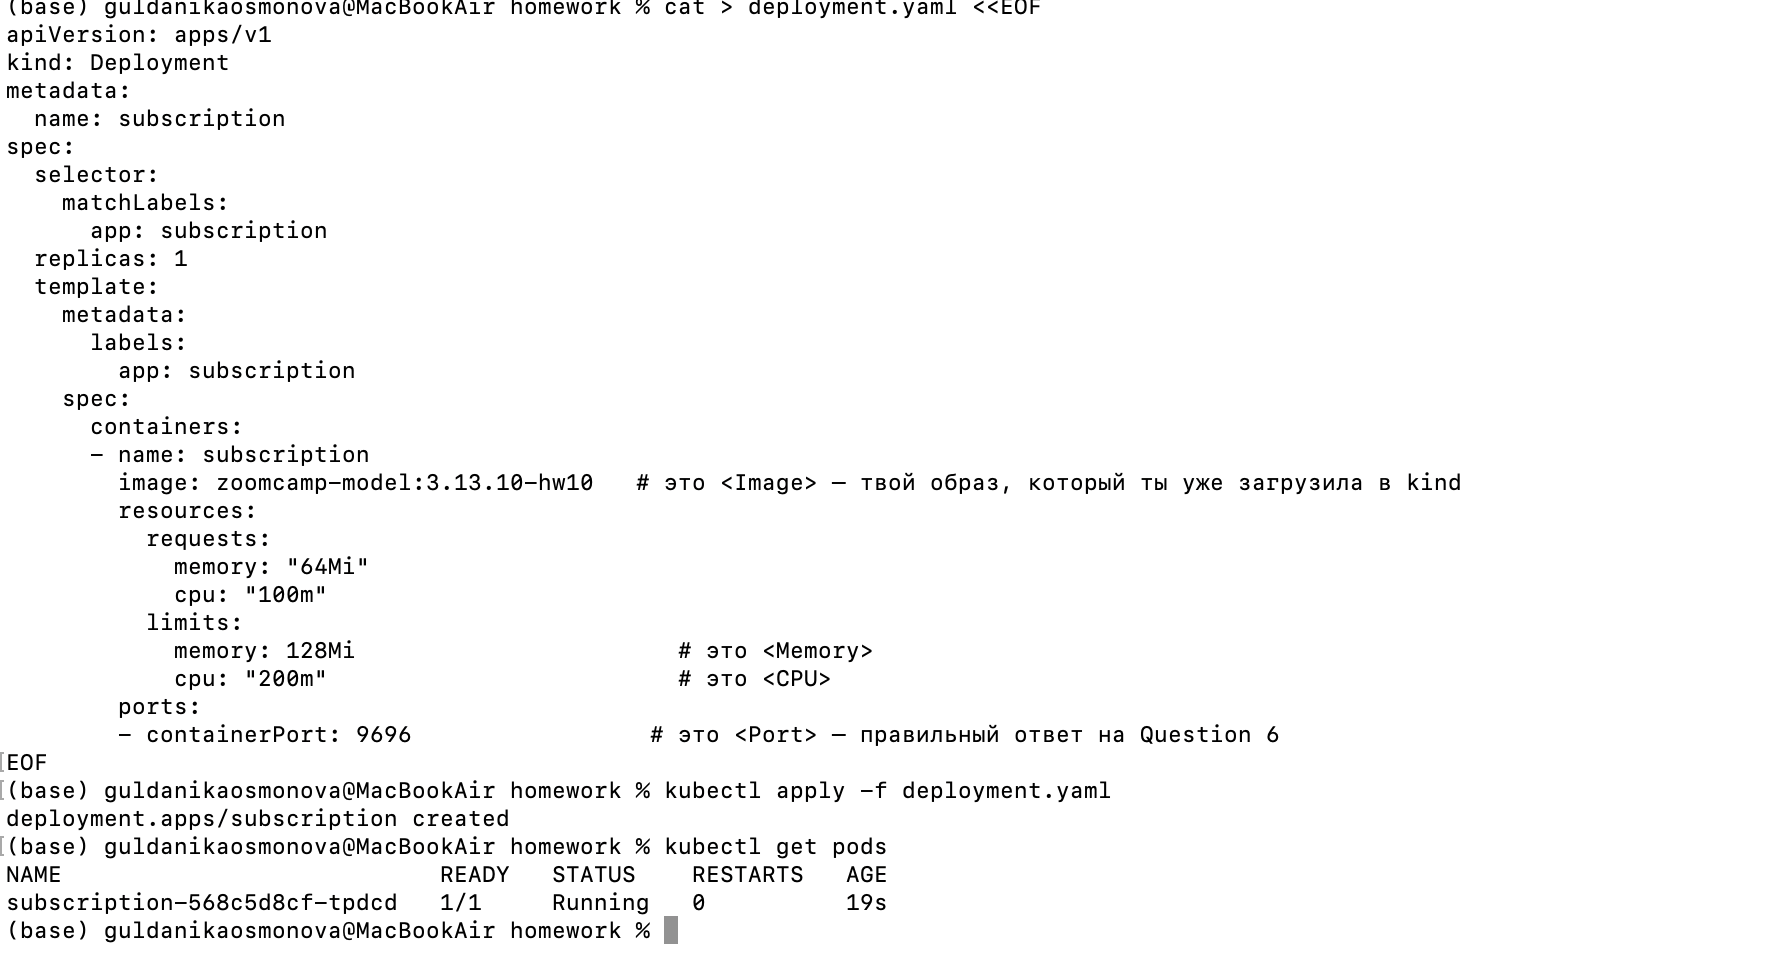

# Question 7

Let's create a service for this deployment (service.yaml):
```
apiVersion: v1
kind: Service
metadata:
  name: <Service name>
spec:
  type: LoadBalancer
  selector:
    app: <???>
  ports:
  - port: 80
    targetPort: <PORT>

```
Fill it in. What do we need to write instead of <???>?

Apply this config file.

Testing the service
We can test our service locally by forwarding the port 9696 on our computer to the port 80 on the service:
```
kubectl port-forward service/<Service name> 9696:80
```
Run q6_test.py (from the homework 5) once again to verify that everything is working. You should get the same result as in Question 1.



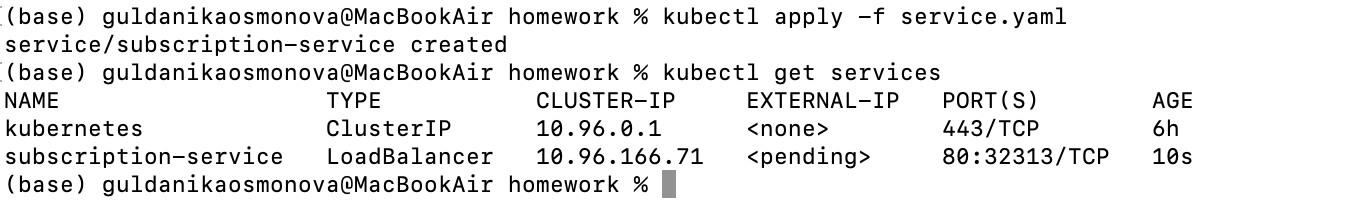